In [80]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  
sns.set(style="darkgrid")  

from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow import keras
from keras import metrics

## Initial model workspace

In [81]:
# Read data
df = pd.read_csv('/Users/achen1/MIDS-W207-DeforestationAndClimate/data/train_monthly.csv', sep='\t')
print(df)

     Unnamed: 0     date  cdsd  cldd  dp01  dp10  dp1x  dsnd  dsnw  dt00  ...  \
0             0  2001-01   0.0   0.0  10.0   5.0   0.0  28.0   6.0   0.0  ...   
1             1  2001-02   0.0   0.0  13.0  10.0   1.0  28.0  10.0   0.0  ...   
2             2  2001-03   0.0   0.0   7.0   6.0   0.0  21.0   3.0   0.0  ...   
3             3  2001-04   0.0   0.0   8.0   6.0   0.0  12.0   6.0   0.0  ...   
4             4  2001-05   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0  ...   
..          ...      ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
162         162  2014-08  45.8   5.3   5.0   2.0   0.0   0.0   0.0   0.0  ...   
163         163  2014-09  46.7   0.9   4.0   2.0   0.0   0.0   0.0   0.0  ...   
164         164  2014-10  46.7   0.0   4.0   2.0   0.0   0.0   0.0   0.0  ...   
165         165  2014-11  46.7   0.0   9.0   6.0   1.0   1.0   1.0   0.0  ...   
166         166  2014-12  46.7   0.0  10.0   9.0   1.0  14.0   4.0   0.0  ...   

     tc_loss_ha_Uruguay  tc

In [82]:
# Check for NaN
nan_counts = df.isna().sum(axis=1)
print(nan_counts)

# Columns with NaN
all_nan_columns = df.columns[df.isna().all()]
print(all_nan_columns)

0      6
1      6
2      6
3      6
4      6
      ..
162    6
163    6
164    6
165    6
166    6
Length: 167, dtype: int64
Index(['dyfg', 'dyts'], dtype='object')


In [83]:
print(df[[col for col in df.columns if 'average' in col]])

     carbon_average  tc_loss_ha_average
0      2.056476e+07        56587.483051
1      2.056476e+07        56587.483051
2      2.056476e+07        56587.483051
3      2.056476e+07        56587.483051
4      2.056476e+07        56587.483051
..              ...                 ...
162    4.359131e+07       100562.338983
163    4.359131e+07       100562.338983
164    4.359131e+07       100562.338983
165    4.359131e+07       100562.338983
166    4.359131e+07       100562.338983

[167 rows x 2 columns]


In [84]:
df.head()

,Unnamed: 0,date,cdsd,cldd,dp01,dp10,dp1x,dsnd,dsnw,dt00,...,tc_loss_ha_Uruguay,tc_loss_ha_Uzbekistan,tc_loss_ha_Vanuatu,tc_loss_ha_Venezuela,tc_loss_ha_Vietnam,"tc_loss_ha_Virgin Islands, U.S.",tc_loss_ha_Zambia,tc_loss_ha_Zimbabwe,tc_loss_ha_Åland,tc_loss_ha_average
0,0,2001-01,0.0,0.0,10.0,5.0,0.0,28.0,6.0,0.0,...,7647,295,124,123881,47433,123,30124,8206,397,56587.483051
1,1,2001-02,0.0,0.0,13.0,10.0,1.0,28.0,10.0,0.0,...,7647,295,124,123881,47433,123,30124,8206,397,56587.483051
2,2,2001-03,0.0,0.0,7.0,6.0,0.0,21.0,3.0,0.0,...,7647,295,124,123881,47433,123,30124,8206,397,56587.483051
3,3,2001-04,0.0,0.0,8.0,6.0,0.0,12.0,6.0,0.0,...,7647,295,124,123881,47433,123,30124,8206,397,56587.483051
4,4,2001-05,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,7647,295,124,123881,47433,123,30124,8206,397,56587.483051


In [85]:
# Feature selection
tf.random.set_seed(1234)
np.random.seed(1234)


print(df.loc[:,['date','snow','tavg','carbon_average','tc_loss_ha_average']][:5])

df = df[['date','snow','tavg','carbon_average','tc_loss_ha_average']]
print(df.head())


      date    snow   tavg  carbon_average  tc_loss_ha_average
0  2001-01   661.0  -1.50    2.056476e+07        56587.483051
1  2001-02  1589.0  -1.50    2.056476e+07        56587.483051
2  2001-03   178.0   3.41    2.056476e+07        56587.483051
3  2001-04   580.0   2.91    2.056476e+07        56587.483051
4  2001-05     0.0  11.98    2.056476e+07        56587.483051
      date    snow   tavg  carbon_average  tc_loss_ha_average
0  2001-01   661.0  -1.50    2.056476e+07        56587.483051
1  2001-02  1589.0  -1.50    2.056476e+07        56587.483051
2  2001-03   178.0   3.41    2.056476e+07        56587.483051
3  2001-04   580.0   2.91    2.056476e+07        56587.483051
4  2001-05     0.0  11.98    2.056476e+07        56587.483051


In [86]:
# Additional imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

tf.random.set_seed(1234)
np.random.seed(1234)



In [88]:
# Partition date values
tf.random.set_seed(1234)
np.random.seed(1234)

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Split into feature and outcome sets
X = df[['year', 'month', 'snow', 'carbon_average', 'tc_loss_ha_average']]
y = df['tavg']


In [89]:
# Train test split
tf.random.set_seed(1234)
np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [92]:
# Run simple model and measure MSE
tf.random.set_seed(1234)
np.random.seed(1234)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)



Root Mean Squared Error: 5.1695903071385


In [93]:
# Simple model measuring R squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

R-squared: 0.4576848334809043


# Remodel
## Base

In [94]:
# Additional imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [95]:
# Read data
df = pd.read_csv('/Users/achen1/MIDS-W207-DeforestationAndClimate/data/train_monthly.csv', sep='\t')
print(df.columns)

Index(['Unnamed: 0', 'date', 'cdsd', 'cldd', 'dp01', 'dp10', 'dp1x', 'dsnd',
       'dsnw', 'dt00',
       ...
       'tc_loss_ha_Uruguay', 'tc_loss_ha_Uzbekistan', 'tc_loss_ha_Vanuatu',
       'tc_loss_ha_Venezuela', 'tc_loss_ha_Vietnam',
       'tc_loss_ha_Virgin Islands, U.S.', 'tc_loss_ha_Zambia',
       'tc_loss_ha_Zimbabwe', 'tc_loss_ha_Åland', 'tc_loss_ha_average'],
      dtype='object', length=1135)


In [96]:
# Test base model within data set

# "DP10" = Number of days with >= 0.1 inch/2.54 millimeters in the year.
# "EMXP" = Highest daily total of precipitation in the year.
# "SNOW" = Total Annual Snowfall. 
# "PRCP" = Total Annual Precipitation.

# tf.random.set_seed(1234)
# np.random.seed(1234)

print(df[['date','dp10','emxp','snow','prcp', 'tavg']].head(10))

df_base = df[['date','dp10','emxp','snow','prcp', 'tavg']]
print(df_base)


      date  dp10  emxp    snow   prcp   tavg
0  2001-01   5.0  18.3   661.0   47.9  -1.50
1  2001-02  10.0  27.9  1589.0  123.5  -1.50
2  2001-03   6.0  13.5   178.0   39.8   3.41
3  2001-04   6.0  19.6   580.0   58.9   2.91
4  2001-05   1.0   6.1     0.0    6.1  11.98
5  2001-06   0.0   0.0     0.0    0.0  13.97
6  2001-07   0.0   0.0     0.0    0.0  16.35
7  2001-08   0.0   0.0     0.0    0.0  17.96
8  2001-09   1.0   8.9     0.0    8.9  14.68
9  2001-10   1.0  20.3     0.0   21.6  10.94
        date  dp10  emxp    snow   prcp   tavg
0    2001-01   5.0  18.3   661.0   47.9  -1.50
1    2001-02  10.0  27.9  1589.0  123.5  -1.50
2    2001-03   6.0  13.5   178.0   39.8   3.41
3    2001-04   6.0  19.6   580.0   58.9   2.91
4    2001-05   1.0   6.1     0.0    6.1  11.98
..       ...   ...   ...     ...    ...    ...
162  2014-08   2.0  13.5     0.0   22.8  16.41
163  2014-09   2.0  17.8     0.0   24.4  14.51
164  2014-10   2.0  10.9     0.0   17.3   9.43
165  2014-11   6.0  25.7    64.0   

In [97]:
# Create feature and outcome

tf.random.set_seed(1234)
np.random.seed(1234)

X = df_base[['dp10', 'emxp', 'prcp', 'snow']]  # Features
y = df_base['tavg']  # Target variable

# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [98]:
# Simple model

tf.random.set_seed(1234)
np.random.seed(1234)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [99]:
# Simple model measuring MSE

tf.random.set_seed(1234)
np.random.seed(1234)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 4.519689341519543


In [100]:
# Coefficients of simple model

print('Model coefficients:', model.coef_)


Model coefficients: [-1.04714805 -0.18621311  0.08709283 -0.00593799]


## Model NN

In [101]:
# Additional imports
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras


In [102]:
# Standardize data
tf.random.set_seed(1234)
np.random.seed(1234)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
# Simple NN
tf.random.set_seed(1234)
np.random.seed(1234)

# Define the RMSE metric function
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1) 
])

model.compile(optimizer='adam',
              loss='mean_squared_error',  # Loss function to minimize
              metrics=[rmse])  # Monitoring RMSE


/Users/achen1/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
# Run model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.1)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 98.9397 - rmse: 9.8919 - val_loss: 57.1654 - val_rmse: 7.7999
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92.3914 - rmse: 9.5565 - val_loss: 53.7729 - val_rmse: 7.5456
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 85.5892 - rmse: 9.1930 - val_loss: 48.9747 - val_rmse: 7.1700
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75.7908 - rmse: 8.6425 - val_loss: 42.0997 - val_rmse: 6.5853
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61.9478 - rmse: 7.7996 - val_loss: 33.5399 - val_rmse: 5.7536
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 45.0710 - rmse: 6.6313 - val_loss: 25.4094 - val_rmse: 4.7599
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.1200 - rmse: 5.3015 - val_loss: 21.2315 - val_rmse: 3.9695
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.2208 - rmse: 4.3766 - val_loss: 22.0608 - val_rmse: 3.8824
Epoch 9/100
12/12 ━━━━━━━━━━━━━━

In [105]:
# NN MSE
tf.random.set_seed(1234)
np.random.seed(1234)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print('Test MSE:', mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print('Test RMSE:', rmse)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test MSE: 15.743173057707425
Test RMSE: 3.9677667594891997


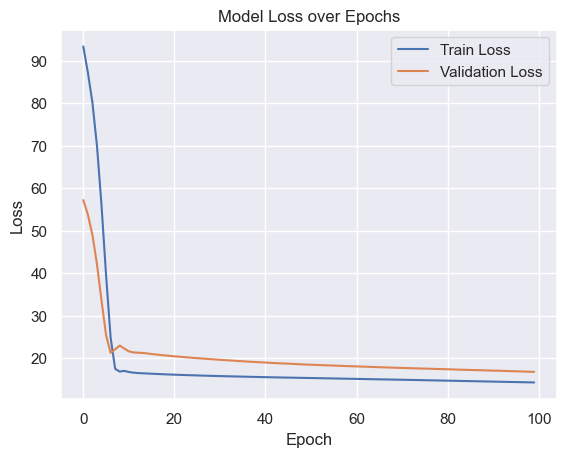

In [106]:
# Plot NN loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# Remodel 2
## Base with carbon and tree loss

In [107]:
# Read data
df2 = pd.read_csv('/Users/achen1/MIDS-W207-DeforestationAndClimate/data/train_monthly.csv', sep='\t')
print(df2.columns)

Index(['Unnamed: 0', 'date', 'cdsd', 'cldd', 'dp01', 'dp10', 'dp1x', 'dsnd',
       'dsnw', 'dt00',
       ...
       'tc_loss_ha_Uruguay', 'tc_loss_ha_Uzbekistan', 'tc_loss_ha_Vanuatu',
       'tc_loss_ha_Venezuela', 'tc_loss_ha_Vietnam',
       'tc_loss_ha_Virgin Islands, U.S.', 'tc_loss_ha_Zambia',
       'tc_loss_ha_Zimbabwe', 'tc_loss_ha_Åland', 'tc_loss_ha_average'],
      dtype='object', length=1135)


In [108]:
# Create new df
print(df2[['date','dp10','emxp','snow','prcp', 'tavg', 'carbon_average','tc_loss_ha_average']].head(10))

df2_base = df2[['date','dp10','emxp','snow','prcp', 'tavg', 'carbon_average','tc_loss_ha_average']]
print(df2_base)

      date  dp10  emxp    snow   prcp   tavg  carbon_average  \
0  2001-01   5.0  18.3   661.0   47.9  -1.50    2.056476e+07   
1  2001-02  10.0  27.9  1589.0  123.5  -1.50    2.056476e+07   
2  2001-03   6.0  13.5   178.0   39.8   3.41    2.056476e+07   
3  2001-04   6.0  19.6   580.0   58.9   2.91    2.056476e+07   
4  2001-05   1.0   6.1     0.0    6.1  11.98    2.056476e+07   
5  2001-06   0.0   0.0     0.0    0.0  13.97    2.056476e+07   
6  2001-07   0.0   0.0     0.0    0.0  16.35    2.056476e+07   
7  2001-08   0.0   0.0     0.0    0.0  17.96    2.056476e+07   
8  2001-09   1.0   8.9     0.0    8.9  14.68    2.056476e+07   
9  2001-10   1.0  20.3     0.0   21.6  10.94    2.056476e+07   

   tc_loss_ha_average  
0        56587.483051  
1        56587.483051  
2        56587.483051  
3        56587.483051  
4        56587.483051  
5        56587.483051  
6        56587.483051  
7        56587.483051  
8        56587.483051  
9        56587.483051  
        date  dp10  emxp    sno

In [109]:
# Create feature and outcome
tf.random.set_seed(1234)
np.random.seed(1234)

X = df2_base[['dp10','emxp','snow','prcp','carbon_average','tc_loss_ha_average']]  # Features
y = df2_base['tavg']  # Target variable

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [110]:
# Simple model
tf.random.set_seed(1234)
np.random.seed(1234)

model = LinearRegression()
model.fit(X_train, y_train)

# Check MSE 
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Check coefficients
print('Model coefficients:', model.coef_)

Mean Squared Error: 22.545343475612125
Root Mean Squared Error: 4.748193706622775
Model coefficients: [-1.04728096e+00 -1.94677059e-01 -5.99209044e-03  9.04387297e-02
 -9.82411399e-08  8.20301793e-05]


## NN Base 2

In [111]:
# Base NN

tf.random.set_seed(1234)
np.random.seed(1234)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
# Base NN model

tf.random.set_seed(1234)
np.random.seed(1234)

# Define the RMSE metric function
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1) 
])

model.compile(optimizer='adam',
              loss='mean_squared_error',  # Loss function to minimize
              metrics=[rmse])  # Monitoring RMSE

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.1)


Epoch 1/100


/Users/achen1/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 93.2874 - rmse: 9.5981 - val_loss: 51.6287 - val_rmse: 7.4394
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 81.5737 - rmse: 8.9688 - val_loss: 45.1098 - val_rmse: 6.9477
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68.3018 - rmse: 8.1970 - val_loss: 37.1689 - val_rmse: 6.2756
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52.5311 - rmse: 7.1761 - val_loss: 28.3039 - val_rmse: 5.3664
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.1510 - rmse: 5.9415 - val_loss: 21.4121 - val_rmse: 4.3956
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.7069 - rmse: 4.8111 - val_loss: 19.5492 - val_rmse: 3.7571
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.2362 - rmse: 4.3151 - val_loss: 20.9292 - val_rmse: 3.6697
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.2031 - rmse: 4.2765 - val_loss: 21.3376 - val_rmse: 3.6989
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Test MSE: 15.935282593340347
Root Mean Squared Error: 3.9919021272246074


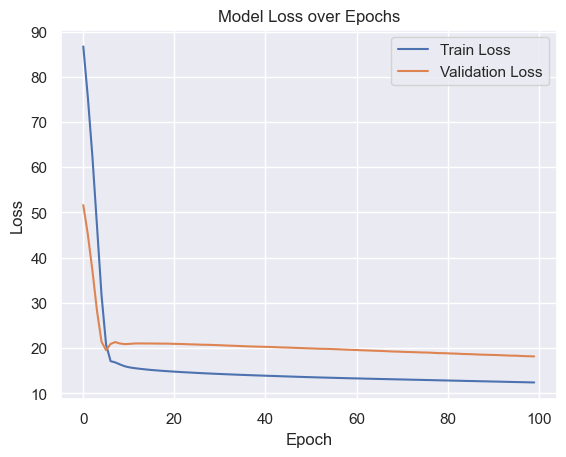

In [113]:
# Check MSE and plot loss

tf.random.set_seed(1234)
np.random.seed(1234)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print('Test MSE:', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## XG Boost

In [120]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [121]:
# Ensure random seeds for reproducibility
np.random.seed(1234)

# Creating features and target variable as specified
X = df2_base[['dp10', 'emxp', 'snow', 'prcp', 'carbon_average', 'tc_loss_ha_average']]
y = df2_base['tavg']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [122]:
# Initialize the XGBoost regressor model
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                         max_depth = 5, alpha = 10, n_estimators = 100)

# Train the model on the training data
model.fit(X_train, y_train)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [123]:
# Predicting the target variable for test data
y_pred = model.predict(X_test)

# Calculating the mean squared error (MSE) for the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)


Mean Squared Error (MSE): 9.359476935445471
Root Mean Squared Error: 3.059326222462304


In [124]:
# GridsearchCV

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define model
xgb_model = xgb.XGBRegressor()

# Parameters grid
parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Setup grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit grid search model
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search.best_score_)))



Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3

In [125]:
# RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 6),
    'gamma': uniform(0, 0.5),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

# Setup randomized search with CV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=100, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1, random_state=1234)

# Fit random search model
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(random_search.best_score_)))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END colsample_bytree=0.6766077801515569, gamma=0.31105438551991593, learning_rate=0.0975455478014229, max_depth=3, min_child_weight=2, n_estimators=243, subsample=0.9442679085510749; total time=   0.0s
[CV] END colsample_bytree=0.6766077801515569, gamma=0.31105438551991593, learning_rate=0.0975455478014229, max_depth=3, min_child_weight=2, n_estimators=243, subsample=0.9442679085510749; total time=   0.1s
[CV] END colsample_bytree=0.6766077801515569, gamma=0.31105438551991593, learning_rate=0.0975455478014229, max_depth=3, min_child_weight=2, n_estimators=243, subsample=0.9442679085510749; total time=   0.0s
[CV] END colsample_bytree=0.660254786242438, gamma=0.0992593795130855, learning_rate=0.17303258681020045, max_depth=7, min_child_weight=3, n_estimators=474, subsample=0.7431269079831466; total time=   0.1s
[CV] END colsample_bytree=0.660254786242438, gamma=0.0992593795130855, learning_rate=0.17303258681020045, max_

## Model with month

In [114]:
# Convert 'date' from string to datetime type
df2_base['date'] = pd.to_datetime(df2_base['date'])

# Create additional time features if necessary, e.g., year and month
df2_base['year'] = df2_base['date'].dt.year
df2_base['month'] = df2_base['date'].dt.month

# Set date as the index if you are using ARIMA or other statsmodels time series methods
df2_base.set_index('date', inplace=True)

# Select features and target
X = df2_base[['dp10', 'emxp', 'prcp', 'snow', 'carbon_average', 'tc_loss_ha_average', 'year', 'month']]  # Adding year and month for seasonality
y = df2_base['tavg']


/var/folders/x2/yzhjy1k15_l79ygfmrgzsyl4000b9n/T/ipykernel_35360/1090536023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_base['date'] = pd.to_datetime(df2_base['date'])
/var/folders/x2/yzhjy1k15_l79ygfmrgzsyl4000b9n/T/ipykernel_35360/1090536023.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_base['year'] = df2_base['date'].dt.year
/var/folders/x2/yzhjy1k15_l79ygfmrgzsyl4000b9n/T/ipykernel_35360/1090536023.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [115]:
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [116]:
# Split data
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [118]:
# Baseline linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)


MSE: 31.624445190870407
Root Mean Squared Error: 5.6235616108361794


In [78]:
# LSTM
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50


/Users/achen1/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 1s - 445ms/step - loss: 551800.5000 - val_loss: 122370.1875
Epoch 2/50
2/2 - 0s - 14ms/step - loss: 551772.6250 - val_loss: 122367.9531
Epoch 3/50
2/2 - 0s - 13ms/step - loss: 551744.9375 - val_loss: 122365.7422
Epoch 4/50
2/2 - 0s - 13ms/step - loss: 551717.3125 - val_loss: 122363.5625
Epoch 5/50
2/2 - 0s - 12ms/step - loss: 551689.3750 - val_loss: 122361.4062
Epoch 6/50
2/2 - 0s - 13ms/step - loss: 551661.3750 - val_loss: 122359.2578
Epoch 7/50
2/2 - 0s - 12ms/step - loss: 551633.0625 - val_loss: 122357.1562
Epoch 8/50
2/2 - 0s - 13ms/step - loss: 551604.5625 - val_loss: 122355.0234
Epoch 9/50
2/2 - 0s - 11ms/step - loss: 551575.5625 - val_loss: 122352.9062
Epoch 10/50
2/2 - 0s - 16ms/step - loss: 551546.3125 - val_loss: 122350.8125
Epoch 11/50
2/2 - 0s - 17ms/step - loss: 551516.3750 - val_loss: 122348.7109
Epoch 12/50
2/2 - 0s - 14ms/step - loss: 551486.0000 - val_loss: 122346.6094
Epoch 13/50
2/2 - 0s - 16ms/step - loss: 551455.0625 - val_loss: 122344.4766
Epoch 14/50
2/2 - 

In [79]:
# Evaluate
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x31048ade0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
MSE: 122221.05652791308
